<a href="https://colab.research.google.com/github/zabinsky/python/blob/main/stuff_for_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tT(CGU)K
snR30
0.5962157143554259


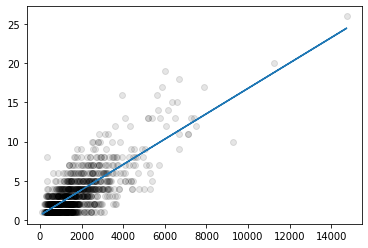

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def main():
    disregard_entries = []
    it_count = 1
    mutations = []
    mut_nums = []
    gene_lens = []
    inviable_list = get_inviable()
    # new_data_doc = open("ma_mutations_gene_lens.txt", "w")
    ma_doc = open("MA2_gvcfs.output_SIFTannotations.xls", "r")
    for line in ma_doc:
        line_split = line.split()
        if "CHROM" not in line_split[0]:
            if line_split[4] in inviable_list and line_split[5] in inviable_list:
              if line_split[4] not in mutations and line_split[5] not in mutations:
                  mutations.append(line_split[4])
                  mut_nums.append(1)
              else:
                for i in range(len(mutations)):
                  if mutations[i] == line_split[4] or mutations[i] == line_split[5]:
                      mut_nums[i] += 1
        print(it_count)
        it_count += 1
    it_count = 1
    for i in range(len(mutations)):
        gene_len = get_gene_len(mutations[i])
        if gene_len == "disregard":
            disregard_entries.append(i)
        else:
          gene_lens.append(gene_len)
        print(it_count)
        it_count += 1
    disregard_entries.sort(reverse = True)
    for item in disregard_entries:
        mut_nums.pop(item)
    '''
    for i in range(len(mut_nums)):
      new_data_doc.write(str(mut_nums[i]) + " " + str(gene_lens[i]) + "\n")
    '''
    plt.plot(gene_lens, mut_nums, "o", color="black", alpha=.1)
    # transforms lists of points into numpy arrays to find line of best fit
    len_arr = np.array(gene_lens)
    mut_arr = np.array(mut_nums)
    m, b = np.polyfit(len_arr, mut_arr, 1)
    plt.plot(len_arr, m*len_arr + b)
    # plt.xscale("log")
    r_sq = get_r_square(gene_lens, mut_nums)
    print(r_sq)
    plt.show()

def get_inviable():
    inviable_genes = []
    inv_doc = open("inviable_annotations.txt")
    for line in inv_doc:
        line_components = line.split()
        if len(line_components) >= 2:
          inviable_genes.append(line_components[1])
    return inviable_genes

    
# source: https://www.kite.com/python/answers/how-to-calculate-r-squared-with-numpy-in-python#:~:text=Use%20numpy.&text=Use%20the%20indexing%20syntax%20%5B0,coefficient%20of%20determination%2C%20R%20squared.
def get_r_square(x_values, y_values):
    correlation_matrix = np.corrcoef(x_values, y_values)
    correlation_xy = correlation_matrix[0, 1]
    r_squared = correlation_xy ** 2
    return r_squared



def get_gene_len(gene_name):
    pos_doc = open("ORF_info_table_wSeq.csv", "r")
    name_len = 0
    for line in pos_doc:
        line_comp = line.split(",")
        if len(line_comp) >= 6:
          if line_comp[6] != "StartPos_1":
              if gene_name == line_comp[0]:
                  for x in range(8):
                      name_len += abs(int(line_comp[14+x]) - int(line_comp[6+x]))
                  return name_len
    return "disregard"

main()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


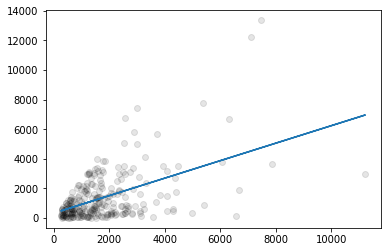

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# STRAIN = "new-Lin8_ORFs_w_bp_sub.csv"
def main():
    iteration_count = 1
    wt_doc = open("wt_mutation_list.txt", "r")
    wt_mutations = []
    gene_lens = []
    # takes each mutated gene and finds degree and SIFT score for it
    # mutated_list = generate_nodes()
    inviable_list = get_inviable()
    for line in wt_doc:
        line_list = line.split(" ")
        gene_name = line_list[0]
        wt_mut = int(line_list[1])
        if gene_name in inviable_list:
            wt_mutations.append(wt_mut)
            gene_len = get_gene_len(gene_name)
            gene_lens.append(gene_len)
        print(iteration_count)
        iteration_count += 1
    print(wt_mutations, gene_lens)
    plt.plot(gene_lens, wt_mutations, "o", color="black", alpha=.1)
    # transforms lists of points into numpy arrays to find line of best fit
    len_arr = np.array(gene_lens)
    mut_arr = np.array(wt_mutations)
    m, b = np.polyfit(len_arr, mut_arr, 1)
    plt.plot(len_arr, m*len_arr + b)

    # plt.xscale("log")
    r_sq = get_r_square(gene_lens, wt_mutations)
    print(r_sq)
    plt.show()

def get_inviable():
    inviable_genes = []
    inv_doc = open("inviable_annotations.txt")
    for line in inv_doc:
        line_components = line.split()
        if len(line_components) >= 2:
          inviable_genes.append(line_components[1])
    return inviable_genes


# source: https://www.kite.com/python/answers/how-to-calculate-r-squared-with-numpy-in-python#:~:text=Use%20numpy.&text=Use%20the%20indexing%20syntax%20%5B0,coefficient%20of%20determination%2C%20R%20squared.
def get_r_square(x_values, y_values):
    correlation_matrix = np.corrcoef(x_values, y_values)
    correlation_xy = correlation_matrix[0, 1]
    r_squared = correlation_xy ** 2
    return r_squared



def get_gene_len(gene_name):
    pos_doc = open("ORF_info_table_wSeq.csv", "r")
    name_len = 0
    for line in pos_doc:
        line_comp = line.split(",")
        if len(line_comp) >= 6:
          if line_comp[6] != "StartPos_1":
              if gene_name == line_comp[0]:
                  for x in range(8):
                      name_len += int(line_comp[14+x]) - int(line_comp[6+x])
                  return name_len                 
main()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


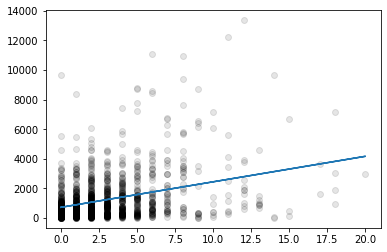

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# STRAIN = "new-Lin8_ORFs_w_bp_sub.csv"
def main():
    iteration_count = 1
    wt_doc = open("wt_mutation_list.txt", "r")
    mutants = []
    wt_mutations = []
    ma_mutations = []
    # takes each mutated gene and finds degree and SIFT score for it
    # mutated_list = generate_nodes()

    for line in wt_doc:
        line_list = line.split(" ")
        gene_name = line_list[0]
        wt_mut = line_list[1]
        ma_mut = get_ma(gene_name)
        mutants.append(gene_name)
        wt_mutations.append(int(wt_mut))
        ma_mutations.append(int(ma_mut))
        print(iteration_count)
        iteration_count += 1
    plt.plot(ma_mutations, wt_mutations, "o", color="black", alpha=.1)
    # transforms lists of points into numpy arrays to find line of best fit
  
    ma_arr = np.array(ma_mutations)
    mut_arr = np.array(wt_mutations)
    m, b = np.polyfit(ma_arr, mut_arr, 1)
    plt.plot(ma_arr, m*ma_arr + b)

    # plt.xscale("log")
    print(m, b)
    r_sq = get_r_square(ma_mutations, wt_mutations)
    print(r_sq)
    plt.show()


# source: https://www.kite.com/python/answers/how-to-calculate-r-squared-with-numpy-in-python#:~:text=Use%20numpy.&text=Use%20the%20indexing%20syntax%20%5B0,coefficient%20of%20determination%2C%20R%20squared.
def get_r_square(x_values, y_values):
    correlation_matrix = np.corrcoef(x_values, y_values)
    correlation_xy = correlation_matrix[0, 1]
    r_squared = correlation_xy ** 2
    return r_squared

def get_ma(gene):
    counter = 0
    ma_doc = open("MA2_gvcfs.output_SIFTannotations.xls", "r")
    for item in ma_doc:
        if len(item.split()) >= 5:
          if item.split()[4] == gene or item.split()[5] == gene:
              counter += 1
    return counter


def get_gene_name(pos):
    pos_doc = open("ORF_info_table_wSeq.csv", "r")
    for line in pos_doc:
        line_comp = line.split(",")
        if line_comp[6] != "StartPos_1":
            for i in range(8):
                if pos in range(int(line_comp[6 + i]), int(line_comp[14 + i]) + 1):
                    return line_comp[0]
    return "no gene name"

main()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from nxviz import CircosPlot
def main():
    g = nx.Graph()
    nodes = []
    file1 = open("data.txt", "r")
    count = 0
    for line in file1:
        if count != 0:
            edge1 = line.split()
            if edge1[5] not in nodes:
                g.add_node(edge1[5])
                nodes.append(edge1[5])
            if edge1[6] not in nodes:
                g.add_node(edge1[6])
                nodes.append(edge1[6])
            g.add_edge(edge1[5], edge1[6])
        count += 1
    c = CircosPlot(er)
    c.draw()
    plt.show()
   
main()

ModuleNotFoundError: ignored